### Creating An ANN using Pytorch

In [1]:
import pandas as pd
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



#### Data Preprocessing and Analysis
Before building the model, it's crucial to preprocess the data and perform exploratory data analysis (EDA). This includes:
- Checking for missing values.
- Normalizing or standardizing the features.
- Exploring data distribution and correlations.


In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [3]:
import seaborn as sns

In [4]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


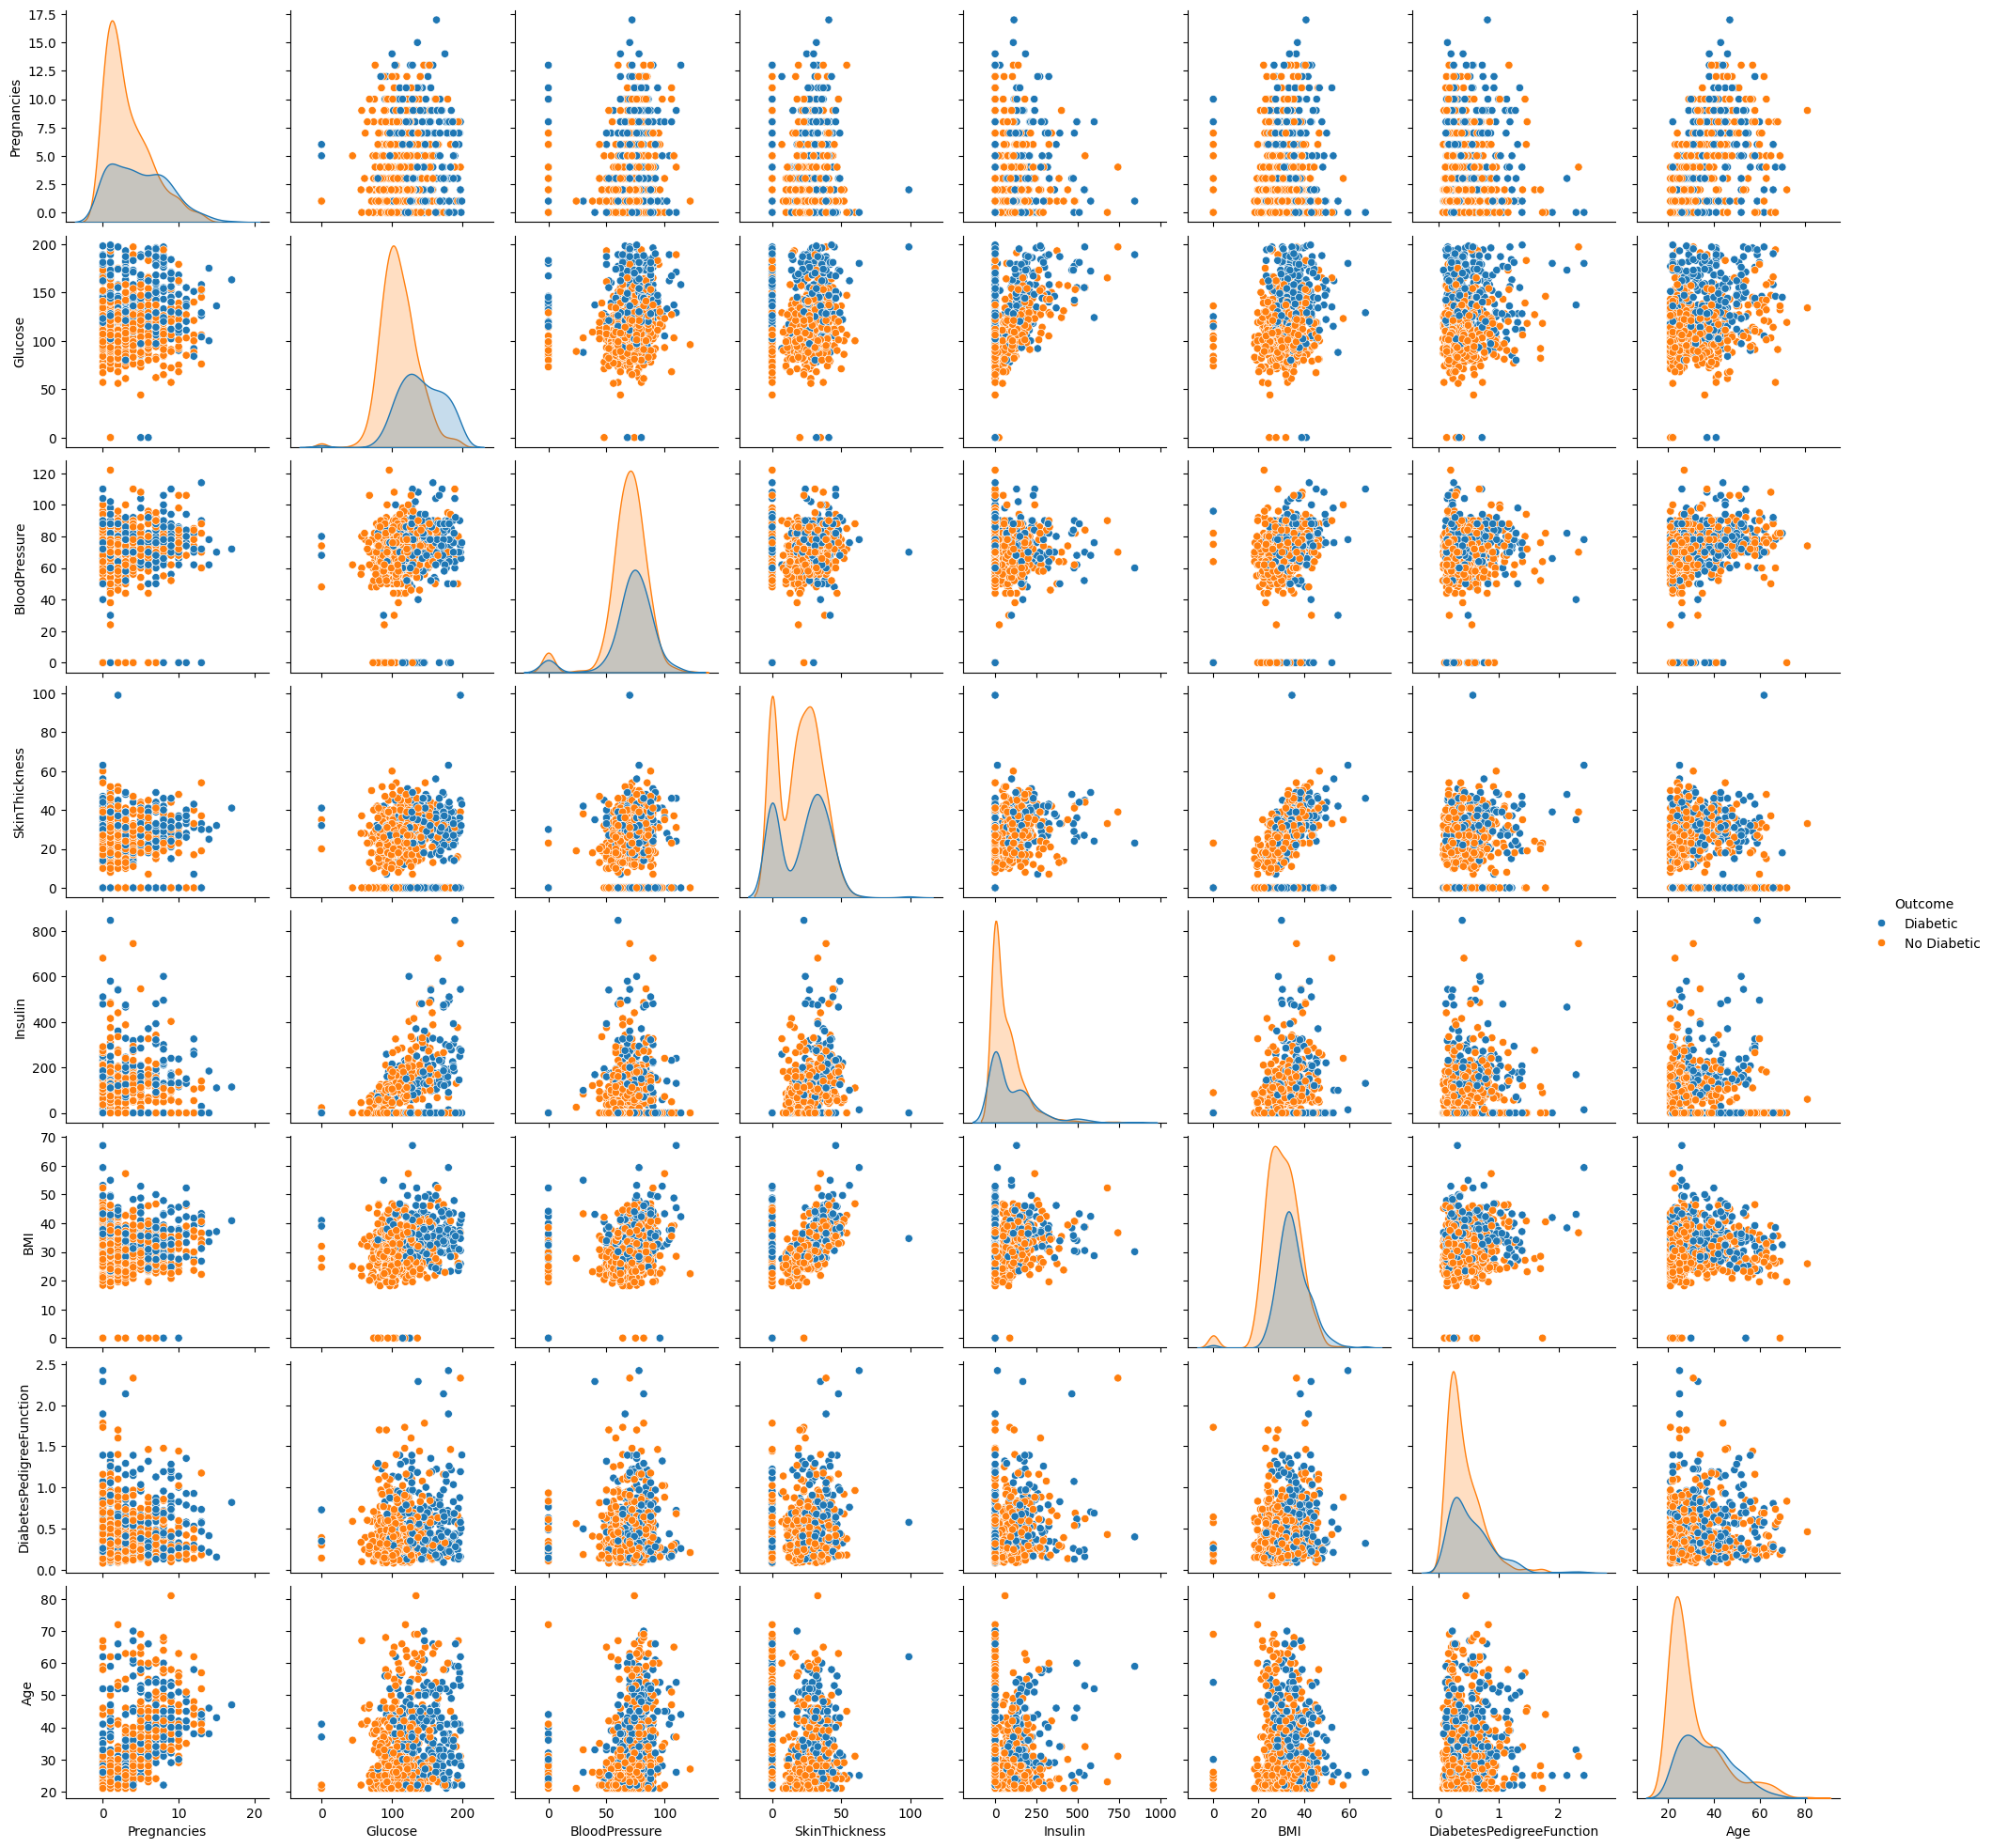

In [6]:
sns.pairplot(df,hue="Outcome")

# Read again dataset

In [7]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

# Split Dataset in Training and Testing

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

# import Pytorch

In [11]:
#### Libraries From Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F

# Creating Tensors

In [12]:
##### Creating Tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)


In [13]:
df.shape

(768, 9)


#### Model Architecture Explanation
The architecture of the ANN is chosen based on the problem specifics. Key considerations include:
- Number of layers and neurons in each layer.
- Choice of activation functions (e.g., ReLU, Sigmoid).
- The reasoning behind the architecture decisions.



#### Training Process Explanation
The training process involves several key components:
- Selection of a loss function (e.g., CrossEntropyLoss for classification).
- Choice of an optimizer (e.g., Adam, SGD).
- Explanation of the training loop, including backpropagation and weight updates.



In [14]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [15]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [16]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

# Backward Propogation-- Define the loss_function,define the optimizer

In [17]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

c:\Users\JillaniDataScientist\anaconda3\envs\DLEnv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
epochs=750
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4712820053100586
Epoch number: 11 and the loss : 0.7136213779449463
Epoch number: 21 and the loss : 0.658026397228241
Epoch number: 31 and the loss : 0.5915648341178894
Epoch number: 41 and the loss : 0.5802218914031982
Epoch number: 51 and the loss : 0.5663574934005737
Epoch number: 61 and the loss : 0.5572977662086487
Epoch number: 71 and the loss : 0.5494176745414734
Epoch number: 81 and the loss : 0.5424416661262512
Epoch number: 91 and the loss : 0.5360018014907837
Epoch number: 101 and the loss : 0.5300321578979492
Epoch number: 111 and the loss : 0.525333821773529
Epoch number: 121 and the loss : 0.5195616483688354
Epoch number: 131 and the loss : 0.5138638019561768
Epoch number: 141 and the loss : 0.508865475654602
Epoch number: 151 and the loss : 0.5030810832977295
Epoch number: 161 and the loss : 0.49736490845680237
Epoch number: 171 and the loss : 0.49016687273979187
Epoch number: 181 and the loss : 0.48538872599601746
Epoch number: 191 and t


#### Visualizations During Training
Visualizing the training process helps in understanding the model's learning behavior:
- Plotting loss and accuracy curves.
- Adjusting hyperparameters based on these visualizations.


In [19]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [20]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

0
1
0
0
0
1
0
0
1
0
1
0
1
1
0
0
1
0
0
0
0
0
1
1
0
0
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
0
1
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
1
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
1
0
1
0
0
0
1
0
0
0
0
0
0
0
1
0
1
1
1
0
0
1
0
1
0
1
0
0
0



#### Performance Metrics and Evaluation
To evaluate the model, various metrics can be used:
- Accuracy, Precision, Recall.
- Confusion Matrix: To visualize true positives, false positives, true negatives, and false negatives.
- ROC Curve and AUC score.


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

array([[81, 16],
       [22, 35]], dtype=int64)

Text(95.72222222222221, 0.5, 'Predicted Values')

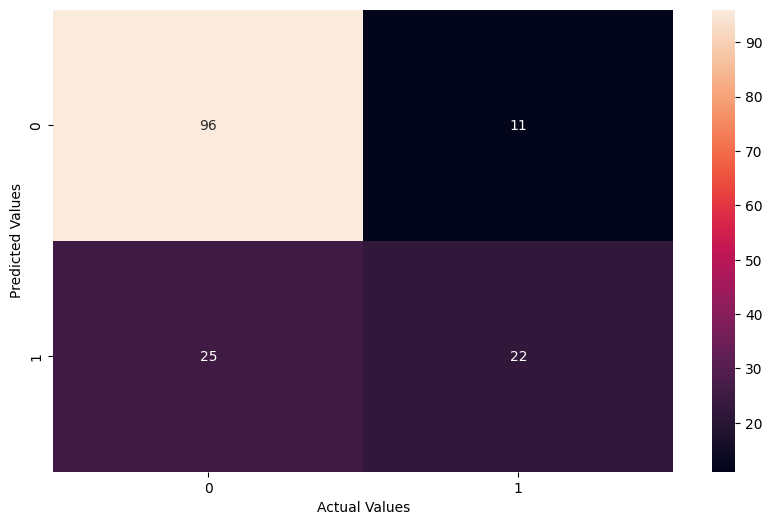

In [21]:
# Implementing Error Handling
# Add error checks and exception handling where necessary.

plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [22]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7532467532467533


#### Saving and Loading the Model
After training, the model can be saved for future use:
- `torch.save(model, 'model.pth')` for saving.
- `model = torch.load('model.pth')` for loading.


In [23]:
#### Save the model
torch.save(model,'diabetes.pt')

In [24]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [25]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)


#### Inference with New Data
Demonstrate how to use the trained model for making predictions on new data.


In [26]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [27]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [28]:
new_data=torch.tensor(lst1)

In [29]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([2.1262, 0.4012])
0


In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load and preprocess the dataset
df = pd.read_csv('diabetes.csv')  # Adjust path as necessary
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# TensorFlow Model
def create_tensorflow_model(input_dim, output_dim):
    model = Sequential([
        Dense(20, input_dim=input_dim, activation='relu'),
        Dense(20, activation='relu'),
        Dense(output_dim, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model
model = create_tensorflow_model(X_train.shape[1], 2)
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy: {:.2f}%".format(accuracy * 100))


5/5 [==============================] - 0s 5ms/step - loss: 0.6974 - accuracy: 0.7792
Accuracy: 77.92%
